<h1><span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Notes" data-toc-modified-id="Notes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Notes</a></span></li><li><span><a href="#Import-Libraries-and-Data" data-toc-modified-id="Import-Libraries-and-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Libraries and Data</a></span></li><li><span><a href="#Clean-Data" data-toc-modified-id="Clean-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Clean Data</a></span><ul class="toc-item"><li><span><a href="#Correct-column-data-type" data-toc-modified-id="Correct-column-data-type-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Correct column data type</a></span></li><li><span><a href="#Create-a-column-that-specifies-the-country-the-hotel-is-located-in" data-toc-modified-id="Create-a-column-that-specifies-the-country-the-hotel-is-located-in-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Create a column that specifies the country the hotel is located in</a></span></li><li><span><a href="#Correct-Review-Word-Counts" data-toc-modified-id="Correct-Review-Word-Counts-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Correct Review Word Counts</a></span></li><li><span><a href="#What-are-the-tags" data-toc-modified-id="What-are-the-tags-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>What are the tags</a></span></li><li><span><a href="#Evaluate-the-words-used-in-the-reviews" data-toc-modified-id="Evaluate-the-words-used-in-the-reviews-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Evaluate the words used in the reviews</a></span></li></ul></li><li><span><a href="#Plot-Data" data-toc-modified-id="Plot-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Plot Data</a></span><ul class="toc-item"><li><span><a href="#Most-Commonly-Used-Words-(Word-Cloud)" data-toc-modified-id="Most-Commonly-Used-Words-(Word-Cloud)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Most Commonly Used Words (Word Cloud)</a></span></li><li><span><a href="#Liberty-Hotel-Reviews-(Scatter-Plot)" data-toc-modified-id="Liberty-Hotel-Reviews-(Scatter-Plot)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Liberty Hotel Reviews (Scatter Plot)</a></span></li><li><span><a href="#UK-Reviews-by-Hotel-Location-(Bar-Plot)" data-toc-modified-id="UK-Reviews-by-Hotel-Location-(Bar-Plot)-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>UK Reviews by Hotel Location (Bar Plot)</a></span></li><li><span><a href="#UK-Travelers-to-Austria-by-Month-(Bar-Plot)" data-toc-modified-id="UK-Travelers-to-Austria-by-Month-(Bar-Plot)-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>UK Travelers to Austria by Month (Bar Plot)</a></span></li></ul></li><li><span><a href="#Export-for-Tableau" data-toc-modified-id="Export-for-Tableau-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Export for Tableau</a></span></li></ul></div>

## Notes
In order not to duplicate all the code from the R report, I will start with the 'CleanedHotelReviews.csv' that was created in the R report. Essentially, the only cleaning that was done there was correcting the duplicate hotel names or addresses and adding the missing geographical coordinates. In this Python/Jupyter report, I will do futher cleaning and some more plotting.

## Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
hotels = pd.read_csv('CleanedHotelReviews.csv')
print(hotels.head(2))

                                             Address  AddNumOfScoring  \
0  s Gravesandestraat 55 Oost 1092 AA Amsterdam N...              194   
1  s Gravesandestraat 55 Oost 1092 AA Amsterdam N...              194   

   ReviewDate  AvgScore        Hotel ReviewerNationality  \
0  2017-08-03       7.7  Hotel Arena              Russia   
1  2017-08-03       7.7  Hotel Arena             Ireland   

                                           NegReview  NegReviewWordCount  \
0  I am so angry that i made this post available ...                 397   
1                                        No Negative                   0   

   TotalReviews                                          PosReview  \
0          1403   Only the park outside of the hotel was beautiful   
1          1403  No real complaints the hotel was great great l...   

   PosReviewWordCount  TotReviewsByReviewer  ReviewerScore  \
0                  11                     7            2.9   
1                 105              

## Clean Data

In [3]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
Address                 515738 non-null object
AddNumOfScoring         515738 non-null int64
ReviewDate              515738 non-null object
AvgScore                515738 non-null float64
Hotel                   515738 non-null object
ReviewerNationality     515215 non-null object
NegReview               514736 non-null object
NegReviewWordCount      515738 non-null int64
TotalReviews            515738 non-null int64
PosReview               515544 non-null object
PosReviewWordCount      515738 non-null int64
TotReviewsByReviewer    515738 non-null int64
ReviewerScore           515738 non-null float64
Tags                    515738 non-null object
DaysSinceReview         515738 non-null int64
Lat                     515738 non-null float64
Long                    515738 non-null float64
dtypes: float64(4), int64(6), object(7)
memory usage: 66.9+ MB


### Correct column data type

Each data type looks correct except need to change 'ReviewDate' to datetime format.

In [4]:
hotels['ReviewDate'] = pd.to_datetime(hotels['ReviewDate'])
type(hotels.loc[0, 'ReviewDate'])

pandas._libs.tslibs.timestamps.Timestamp

### Create a column that specifies the country the hotel is located in
To do this, I extracted the last word of each address, which is the country name. The result was only 6 countries.

In [5]:
hotels['Country'] = hotels['Address'].str.split().str[-1]

In [6]:
print(hotels['Country'].unique())

['Netherlands' 'Kingdom' 'France' 'Spain' 'Italy' 'Austria']


The one named 'Kingdom' needs to be renamed to 'United Kingdom'

In [7]:
hotels['Country'] = hotels['Country'].replace('Kingdom', 'United Kingdom')

In [8]:
print(hotels['Country'].unique())

['Netherlands' 'United Kingdom' 'France' 'Spain' 'Italy' 'Austria']


### Correct Review Word Counts

To pick up from where I left off in the R report, I want to do more cleaning with the Reviews. In the NegReviews and PosReviews columns, the WordCount for a review that says 'No Negative' or 'No Positive' is listed as 0. Then the rest of the reviews seem to have their word count increased by 1 or more. I also discovered in the R report that there are 'NA' reviews. If I remove the 'No Negative/Positive' words and then recount the number of words in the review, then the 'NA's will be classified as 0 words, which will essentially denote them as 'No Negative/Positive'. But this isn't the case. I will instead convert all 'NA's to 'No Review Given'. This will skew the number of 3 word reviews, so would need to be filtered out if doing plots or other comparisons. After dealing with the 'NA's, I will remove all words from the 'No Negative/Positive' and recount the words in the reviews.

In [9]:
# This is to verify that 'No Positive' was handled the same way as 'No Negative' which was determined in the R report
nopositive = hotels[hotels['PosReviewWordCount'] == 0]
print(nopositive['PosReview'].unique())
del nopositive

['No Positive']


As expected, all 0 word PosReview have the review as 'No Positive'. Let's get the word counts again so we can verify once we have made the changes. In the R report it was shown that there are no 1 word NegReviews or PosReviews.

In [10]:
negwordcount = hotels.groupby(['NegReviewWordCount']).count()
poswordcount = hotels.groupby(['PosReviewWordCount']).count()
print('Total Negative/Positive Reviews with 0 word counts:', negwordcount.iloc[0,0], '/', poswordcount.iloc[0,0])
print('Total Negative/Positive Reviews with 2 word counts:', negwordcount.iloc[1,0], '/', poswordcount.iloc[1,0])
print('Total Negative/Positive Reviews with 3 word counts:', negwordcount.iloc[2,0], '/', poswordcount.iloc[2,0])
print('Total Negative/Positive Reviews with 4 word counts:', negwordcount.iloc[3,0], '/', poswordcount.iloc[3,0])
print('Total Negative/Positive Reviews with 5 word counts:', negwordcount.iloc[4,0], '/', poswordcount.iloc[4,0])

Total Negative/Positive Reviews with 0 word counts: 127890 / 35946
Total Negative/Positive Reviews with 2 word counts: 24647 / 20934
Total Negative/Positive Reviews with 3 word counts: 18144 / 22533
Total Negative/Positive Reviews with 4 word counts: 15063 / 24656
Total Negative/Positive Reviews with 5 word counts: 16809 / 26844


Now fill in all NAs with 'No Review Given'

In [11]:
hotels['NegReview'].fillna('No Review Given', inplace=True)
hotels['PosReview'].fillna('No Review Given', inplace=True)

Verify that the only column containing 'NA's is ReviewerNationality. The 'NA's in Lat and Long were filled in with the R report, leaving on NegReview, PosReview, and ReviewerNationality.

In [12]:
hotels.columns[hotels.isna().any()].tolist()

['ReviewerNationality']

Remove 'No Negative' and 'No Positive' so that the review is empty.

In [13]:
hotels['NegReview'].replace('No Negative', '', inplace=True)
hotels['PosReview'].replace('No Positive', '', inplace=True)

Recalculate word counts. After removing leading and trailing whitespace.

In [14]:
hotels['NegReview'] = hotels['NegReview'].str.strip() # Strip out leading and trailing whitespace
hotels['NegReviewWordCount'] = 1 + hotels['NegReview'].str.count(' ')  # Count white space and add 1 for word count
hotels[['NegReviewWordCount']] = hotels[['NegReviewWordCount']].where(hotels['NegReview'] !='', 0) # Put 0 for all No Negative reviews
# Same thing for Positive reviews
hotels['PosReview'] = hotels['PosReview'].str.strip()
hotels['PosReviewWordCount'] = 1 + hotels['PosReview'].str.count(' ') 
hotels[['PosReviewWordCount']] = hotels[['PosReviewWordCount']].where(hotels['PosReview'] !='', 0)

What are the new Review Word Counts?

In [15]:
negwordcount = hotels.groupby(['NegReviewWordCount']).count()
poswordcount = hotels.groupby(['PosReviewWordCount']).count()
print('Total Negative/Positive Reviews with 0 word counts:', negwordcount.iloc[0,0], '/', poswordcount.iloc[0,0])
print('Total Negative/Positive Reviews with 2 word counts:', negwordcount.iloc[1,0], '/', poswordcount.iloc[1,0])
print('Total Negative/Positive Reviews with 3 word counts:', negwordcount.iloc[2,0], '/', poswordcount.iloc[2,0])
print('Total Negative/Positive Reviews with 4 word counts:', negwordcount.iloc[3,0], '/', poswordcount.iloc[3,0])
print('Total Negative/Positive Reviews with 5 word counts:', negwordcount.iloc[4,0], '/', poswordcount.iloc[4,0])
del (negwordcount, poswordcount)

Total Negative/Positive Reviews with 0 word counts: 127890 / 35946
Total Negative/Positive Reviews with 2 word counts: 29210 / 23278
Total Negative/Positive Reviews with 3 word counts: 16052 / 24914
Total Negative/Positive Reviews with 4 word counts: 17636 / 26613
Total Negative/Positive Reviews with 5 word counts: 17923 / 29436


As expected, the number of 0 word count entries remained unchanged, but now the other word counts have been adjusted to accurately reflect how many words are actually in each review.

### What are the tags

There is no information given in the notes regarding the data set that indicate what the possible tags are. I'd like to separate them out to see what the possibilities are. I first clean out the unnecessary characters and make a column to count how many tags are in each review.

In [16]:
def cleanstring(taglist): # Remove unnecessary characters
    newlist = re.sub("(\[' )|( ']*)", '', taglist)
    newlist = re.sub(", ", ',', newlist)
    return newlist
hotels['Tags'] = [cleanstring(row) for row in hotels['Tags']]
hotels['Tag Count'] = hotels['Tags'].str.count(',') + 1 # count the commas and add one to count the number of tags
print('Max number of tags in any one review:', max(hotels['Tag Count']))
del cleanstring

Max number of tags in any one review: 6


Now I need to make a list of words that are in this column

In [17]:
tagslist = np.unique(np.hstack(hotels['Tags'].str.split(','))).tolist()
print('Number of unique tags:', len(tagslist))

Number of unique tags: 2428


In [18]:
print(tagslist[5:14])
del tagslist

['2 Connecting Double Rooms', '2 Connecting Rooms', '2 Connecting Rooms 4 Adults', '2 Connecting Rooms 4 people', '2 Connecting Rooms 5 Adults', '2 Connecting Rooms 5 people', '2 Double Rooms next to each other', '2 Twin Beds Guest Room', '2 double Connecting Rooms']


There are more unique tags than I had expected. After looking through some of the tags, it appears that these are tags created by the reviewer and not tags created by the review system and simply selected by the reviewer. For example, one tag is "2 Connecting Double Rooms" and another is "2 double Connecting Rooms". Instead of evaluating the tags further, I want to evaluate the words that are used in the reviews. However, there is much that could be done here in comparing tags and review scores.

### Evaluate the words used in the reviews

First I need to create two columns where all punctuation has been removed so that "was," (was followed by a comma) will be equal to "was" and where everything is in lowercase so that "Hotel" will be equal to "hotel". Since the reviews will be split on the spaces, adding a comma or other punctuation will make the words appear to be different. The same is true of capital and lower case letters.

In [19]:
hotels['Negatives'] = [re.sub(r'[^\w\s]', '', row) for row in hotels['NegReview']] # remove punctuation
hotels['Positives'] = [re.sub(r'[^\w\s]', '', row) for row in hotels['PosReview']]
hotels['Positives'] = hotels.Positives.str.lower() # make everything lowercase
hotels['Negatives'] = hotels.Negatives.str.lower()
print('An example of the first Negative Review is:\n', hotels.loc[0, 'Negatives'])

An example of the first Negative Review is:
 i am so angry that i made this post available via all possible sites i use when planing my trips so no one will make the mistake of booking this place i made my booking via booking com we stayed for 6 nights in this hotel from 11 to 17 july upon arrival we were placed in a small room on the 2nd floor of the hotel it turned out that this was not the room we booked i had specially reserved the 2 level duplex room so that we would have a big windows and high ceilings the room itself was ok if you don t mind the broken window that can not be closed hello rain and a mini fridge that contained some sort of a bio weapon at least i guessed so by the smell of it i intimately asked to change the room and after explaining 2 times that i booked a duplex btw it costs the same as a simple double but got way more volume due to the high ceiling was offered a room but only the next day so i had to check out the next day before 11 o clock in order to get the 

The number of different words used in over 515k reviews will be too large to look at. Instead, I consider only at the words that are used more than 10,000 times (approx 2%) in either Pos or Neg Reviews. 

In [20]:
negwordcount = hotels.Negatives.str.split().explode().value_counts()
negwordcount = pd.DataFrame(negwordcount)
negwordcount10k = negwordcount[negwordcount['Negatives'] > 10000]
print('There are', len(negwordcount10k), 'words used over 10,000 times in Negative Reviews')
# Now the same for PosReviews
poswordcount = hotels.Positives.str.split().explode().value_counts()
poswordcount = pd.DataFrame(poswordcount)
poswordcount10k = poswordcount[poswordcount['Positives'] > 9999]
print('There are', len(poswordcount10k), 'words used over 10,000 times in Positive Reviews')

There are 124 words used over 10,000 times in Negative Reviews
There are 112 words used over 10,000 times in Positive Reviews


Now I look at all 236 of these words and pick out words that specify a service or feature of the hotel that I could investigate further to see why they are leaving a negative or positive review.

In [21]:
pd.set_option('display.max_rows', None)
negwordcount10k

,Negatives
the,531268
was,236750
a,230251
to,228892
and,219473
room,176026
in,168040
not,125701
i,122298
of,120631


For Negative Reviews, the words of interest are: room, breakfast, staff, nothing, rooms, bed, bathroom, shower, service, bar, reception, expensive, price, floor, water, coffee, wifi, door, booking, food, location, area, restaurant, booked.

In [22]:
poswordcount10k

,Positives
the,515247
and,420617
was,236743
staff,194574
location,192856
very,192743
to,187933
a,164977
room,140746
hotel,125326


In [23]:
pd.set_option('display.max_rows', 8)
del (negwordcount, poswordcount, negwordcount10k, poswordcount10k)

For Positive Reviews, the words of interest are: staff, location, room, breakfast, bed, rooms, station, everything, service, bar, bathroom, view, food, metro, reception, area, free, facilities, beds, restaurant, restaurants, shower.  

Now I combine these lists so I can filter out the words of interest.

In [24]:
wordsofinterest = ("area", "bar", "bathroom", "bed", "beds", "booked", "booking", "breakfast", "coffee", "door", "everything",
                   "expensive", "facilities", "floor", "food", "free", "location", "metro", "nothing", "price", "reception", 
                   "restaurant", "restaurants", "room", "rooms", "service", "shower", "staff", "station", "view", "water", "wifi")
words = pd.DataFrame(wordsofinterest)
words.columns = ['Word']
print('The number of words to be evaluated is', len(words))
del wordsofinterest

The number of words to be evaluated is 32


Some of these words are used in singular and plural form. I will go back through all of the counts to pull both singular and plural even though the use of singular (or plural) did not happen more than 10,000 times, but the other version did. I will also group these together. At this point, I could further evaluate the reviews by looking at words that follow adjectives. So I could look at words that follow "small" or "noisy". But for now, I will simply look at the nouns which signify a service or feature of the hotel that is most associated with bad reviews. Without further evaluation, it is possible that some of the reviews said something positive about this feature even though it is in the negative review. For example, a reviewer may have said "Nothing was good in this hotel except for their breakfast." So breakfast would be associated with the negative review even though it was meant as a positive.

In [25]:
reviewwords = pd.DataFrame(columns=['Word', 'NegCount', 'NegMeanScore','PosCount', 'PosMeanScore'])
def info(word):
    global reviewwords
    negworddf = hotels[hotels['Negatives'].str.find(word) > 0]
    posworddf = hotels[hotels['Positives'].str.find(word) > 0]
    reviewwords = reviewwords.append(
        {'Word': word, 'NegCount': len(negworddf), 'NegMeanScore': round(negworddf['ReviewerScore'].mean(), 2),
        'PosCount': len(posworddf), 'PosMeanScore': round(posworddf['ReviewerScore'].mean(), 2)}, ignore_index=True)
[info(word) for word in words['Word']]
reviewwords

,Word,NegCount,NegMeanScore,PosCount,PosMeanScore
0,area,11209,7.73,17417,8.64
1,bar,20532,7.71,25854,8.89
2,bathroom,22737,7.27,18099,8.73
3,bed,32589,7.18,59295,8.76
...,...,...,...,...,...
28,station,4229,7.89,30462,8.55
29,view,10604,7.80,21819,8.86
30,water,12382,7.33,5917,8.66
31,wifi,8444,7.59,6899,8.51


Of these 32 words, some of them (restaurant/restaurants, room/rooms, bed/beds, booked/booking) should be combined as they are essentially the same.

In [26]:
def combine(word1, word2):
    global reviewwords
    thisword = pd.DataFrame(reviewwords[reviewwords['Word'] == word1])
    thatword = pd.DataFrame(reviewwords[reviewwords['Word'] == word2])
    negcount = thisword.iat[0,1] + thatword.iat[0,1]
    negmeanscore = ((thisword.iat[0,2] * thisword.iat[0,1]) + (thatword.iat[0,2] * thatword.iat[0,1])) / negcount
    poscount = thisword.iat[0,3] + thatword.iat[0,3]
    posmeanscore = ((thisword.iat[0,4] * thisword.iat[0,3]) + (thatword.iat[0,4] * thatword.iat[0,3])) / poscount
    reviewwords = reviewwords.append(
        {'Word': word1 + ' / ' + word2, 'NegCount': negcount, 'NegMeanScore': round(negmeanscore,2),
        'PosCount': poscount, 'PosMeanScore': round(posmeanscore,2)}, ignore_index=True)
    reviewwords = reviewwords.drop(reviewwords[(reviewwords.Word == word1) | (reviewwords.Word == word2)].index)  
combine('bed', 'beds')
combine('booked', 'booking')
combine('restaurant', 'restaurants')
combine('room', 'rooms')
reviewwords.sort_values(['Word'], inplace=True)
reviewwords.reset_index(drop=True, inplace=True)
reviewwords.head()

,Word,NegCount,NegMeanScore,PosCount,PosMeanScore
0,area,11209,7.73,17417,8.64
1,bar,20532,7.71,25854,8.89
2,bathroom,22737,7.27,18099,8.73
3,bed / beds,39633,7.17,72532,8.77
4,booked / booking,17515,6.90,5873,8.74


In [27]:
del(reviewwords, info, combine)

It is interesting to note right off, that the only times these words resulted in a mean score less than 7.0 is when the words were "staff", "reception", "booking". It would appear that booking, checking in, and dealing with the staff are the most negative aspects. Booking may be done electonically, but could also be face to face or over the phone with a live person. Thus the people working at the hotel seem to impact the negative reviews even more than the facilities themself.  Also "everything" gives the highest negative review rating, implying that the comments were probably "everything was great" as opposed to "everything was wrong". More work could be done on this, but this will suffice for this report.

## Plot Data

In [28]:
%matplotlib inline
#import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS#, ImageColorGenerator
#from os import path
#from PIL import Image
import seaborn as sns
sns.set(style='darkgrid')

### Most Commonly Used Words (Word Cloud)
Subset only the rows where the Negatives or Positives contain the words of interest.

In [29]:
negativeswc = pd.DataFrame(data=None, columns=hotels.columns) # create empty dataframe with columns matching hotels
positiveswc = negativeswc[:]
def grabrows(word): # function to subset the rows that contain a word of interest
    global negativeswc
    global positiveswc
    thisnegword = hotels[hotels['Negatives'].str.find(word) > 0]
    thisposword = hotels[hotels['Positives'].str.find(word) > 0]
    negativeswc = negativeswc.append(thisnegword)
    positiveswc = positiveswc.append(thisposword)
[grabrows(word) for word in words['Word']]
# Since some reviews will contain more than one word of interest, need to drop the duplicates that would have been subset.
negativeswc.drop_duplicates(inplace=True)
positiveswc.drop_duplicates(inplace=True)
del (grabrows, words)

Now I need to grab all the Negatives and combine them into one long string and do another string for the Positives.

In [30]:
negstrings = negativeswc['Negatives']
allnegs = ' '.join(negstrings)
posstrings = positiveswc['Positives']
allposs = ' '.join(posstrings)
del(negstrings, posstrings, negativeswc, positiveswc)

Now I need to create a word clouds for the most used words in Negative Reviews and in Positive Reviews.

In [31]:
stopwords = set(STOPWORDS)
stopwords.update(['room', 'rooms', 'hotel']) # these words are in virtually every review and offer little insight

# instantiate a word cloud object
negwordcloud = WordCloud(colormap='autumn', max_words=60, stopwords=stopwords)
poswordcloud = WordCloud(colormap='summer', max_words=60, stopwords=stopwords)

# create word clouds
negwordcloud.generate(allnegs)
poswordcloud.generate(allposs)
del(allnegs, allposs, stopwords)

Plot the word clouds

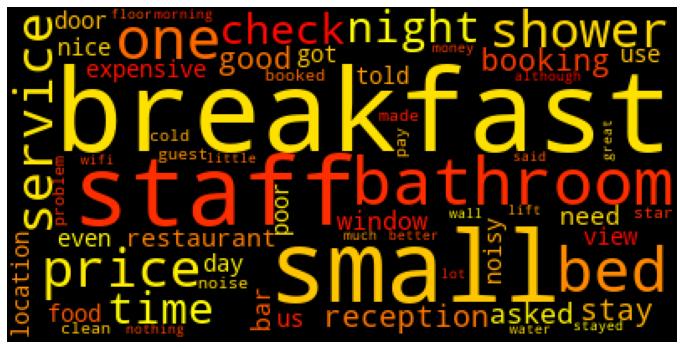

In [32]:
plt.figure(figsize=[12,12])
plt.imshow(negwordcloud)
plt.axis('off')
plt.show()
del negwordcloud

What sticks out about this word cloud is the breakfast, bathroom, staff, service, shower, bed, and price. Unfortunately, there are no two word terms (like a noun and a descriptive adjective) to tell us what is wrong with the breakfast, etc. But further evaluation could be done to see what words are associated with these words.

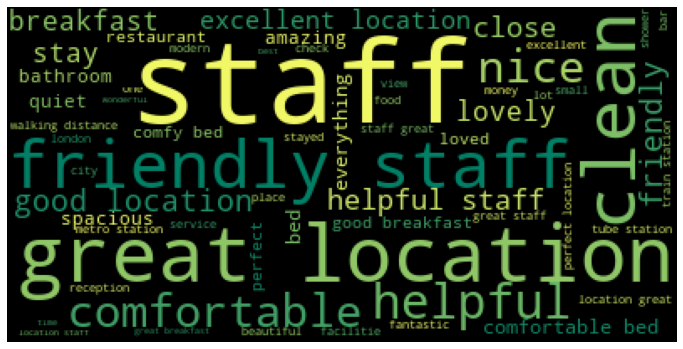

In [33]:
plt.figure(figsize=[12,12])
plt.imshow(poswordcloud)
plt.axis('off')
plt.show()
del poswordcloud

Here, the staff sticks out as the one main comment the people are putting in the positive reviews. This word cloud does include many two word items as well, such as good location, great location, and perfect location.

### Liberty Hotel Reviews (Scatter Plot)

Based off the report done in R, I found that Hotel Liberty had an average reviewer score of 5.2 which is over a full point lower than the next lowest average review score of 6.4. Let's see how Hotel Liberty's score has moved over time.

In [34]:
liberty = hotels[hotels['Hotel'] == 'Hotel Liberty']
print('There are', len(liberty), 'reviews on Hotel Liberty.')
print('The earliest review was on', min(liberty['ReviewDate']), 'and the last review was on', max(liberty['ReviewDate']))

There are 65 reviews on Hotel Liberty.
The earliest review was on 2015-09-08 00:00:00 and the last review was on 2017-07-12 00:00:00


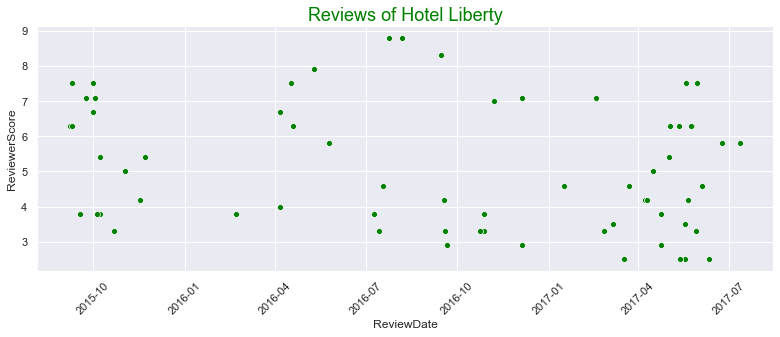

In [35]:
p = sns.relplot(x='ReviewDate', y='ReviewerScore', data=liberty, color='green')
p.set_xticklabels(rotation=45)
plt.title('Reviews of Hotel Liberty', size=18, color='green')
p.fig.set_figwidth(12)
p.fig.set_figheight(4)
del liberty

The scores look fairly consistent over time. There doesn't seem to be an improvement or decline in scores. However, the lowest scores were given in 2017 and its three highest reviews were all in the summer/autumn of 2016.

### UK Reviews by Hotel Location (Bar Plot)

In the R report, we saw that people from the UK reviewed almost 8 times as much as any other country. Lets look at how those from the UK typically reviewed hotels based off the country the hotel was located in.

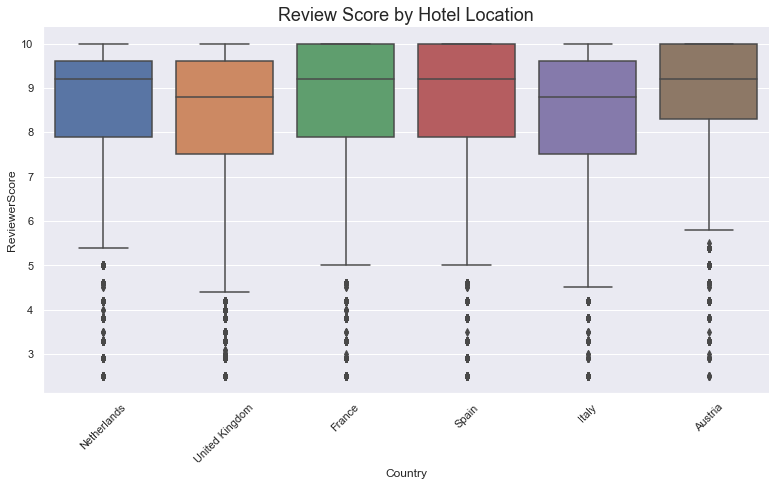

In [36]:
ukers = hotels[hotels['ReviewerNationality'] == 'United Kingdom']
c = sns.catplot(x='Country', y='ReviewerScore', kind='box', data=ukers)
c.set_xticklabels(rotation=45)
plt.title('Review Score by Hotel Location', size=18)
c.fig.set_figwidth(12)
c.fig.set_figheight(6)

The hotels in Austria seem to be well liked by travelers from the UK, and hotels in Italy or the UK seem to get the least amount of love.

### UK Travelers to Austria by Month (Bar Plot)

For the final plot, let's look at when UK travelers were staying in hotels in Austria. This actually only records those that left reviews, not all travelers, but for this plot I will assume that the percentage of travelers that left reviews remained fairly constant.

In [37]:
ukers = ukers[ukers['Country'] == 'Austria']
print('The earliest review by a UKer in Austria was on', min(ukers['ReviewDate']), 'and the last review was on', max(ukers['ReviewDate']))

The earliest review by a UKer in Austria was on 2015-08-04 00:00:00 and the last review was on 2017-08-03 00:00:00


Since this covers exactly two years, we can separate the months out evenly instead of having to account for some months being used more than others, like we would have to do if it only covered 15 months or covered 26 months.

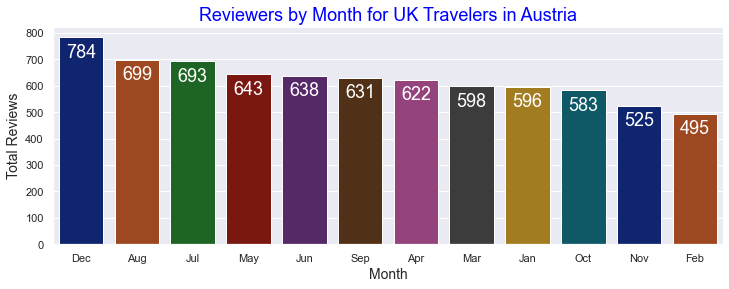

In [38]:
ukers['Month'] = ukers['ReviewDate'].dt.strftime('%b')
plt.figure(figsize=(12, 4))
splot=sns.countplot(x='Month', data=ukers, palette ='dark', order = ukers['Month'].value_counts().index)
for p in splot.patches:
    splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), color = 'white', size=18,
                   ha = 'center', va = 'center', xytext = (0, -15), textcoords = 'offset points')
plt.xlabel('Month', size=14)
plt.ylabel('Total Reviews', size=14)
plt.title('Reviewers by Month for UK Travelers in Austria', size=18, color='blue')
plt.show()
del ukers

## Export for Tableau

In order to keep the cleaning I made in the report, but keep the file size smaller, I am going to export the hotels data set without some column for importing into Tableau. I will remove Address, NegReview, PosReview, Lat, Long, Tag Count, Negatives, and Positives.

In [39]:
hotels = hotels[['AddNumOfScoring', 'ReviewDate', 'AvgScore', 'Hotel', 'ReviewerNationality', 'NegReviewWordCount', 
                 'TotalReviews', 'PosReviewWordCount', 'TotReviewsByReviewer', 'ReviewerScore', 'Tags', 
                 'DaysSinceReview', 'Country']]

In [40]:
hotels.to_csv('HotelsForTableau.csv', index=False)